Step 0/150000
Step 10000/150000
Step 20000/150000
Step 30000/150000
Step 40000/150000
Step 50000/150000
Step 60000/150000
Step 70000/150000
Step 80000/150000
Step 90000/150000
Step 100000/150000
Step 110000/150000
Step 120000/150000
Step 130000/150000
Step 140000/150000


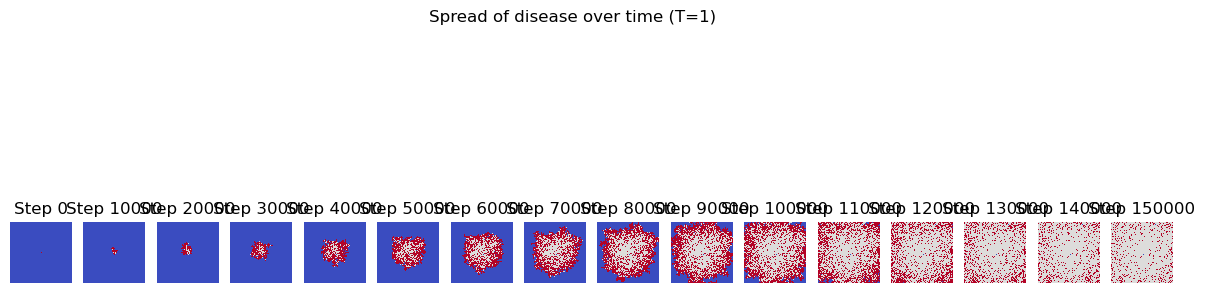

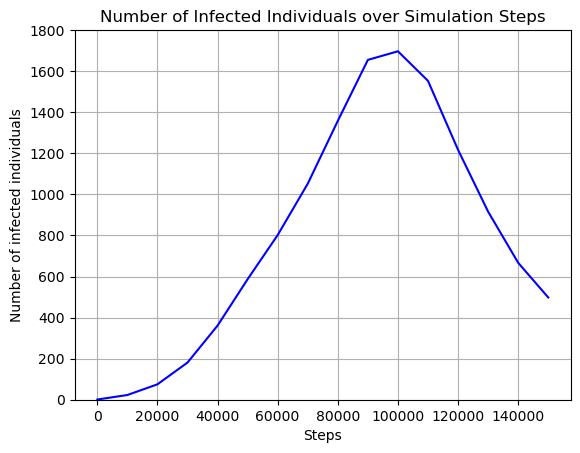

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 64 # Lattice size (LxL)
J = 1 # Interaction strength
h = 2 # Illness (recovery increases as h decreases)
T = 1 # Temperature(Keep at 1)
steps = 150000  # Total number of Monte Carlo steps
save_interval = 10000  # Interval to save the lattice state
k_B = 1.0  # Boltzmann constant(Keep at 1)

# Initialize the lattice with random stances: 'infected' (+1) or 'non-infectd' (-1)
lattice = np.ones((L, L), dtype=int)*-1
lattice[L//2, L//2] = 1  # Start with one infected individual in the middle

def count_spins(lattice):
    up=np.count_nonzero(lattice==1)
    down=np.count_nonzero(lattice==-1)
    return up,down
        
def J_n(J,up,down):
    n_quarantine=0*(0.75*down+0.9*up)
    
    n_total=up+down
    n_free=n_total-n_quarantine
    J_n=J*n_free/n_total
    return J_n

def monte_carlo_step(lattice, J, h, T):
    """Perform one Monte Carlo step using Glauber dynamics."""
    L = lattice.shape[0]
    i, j = np.random.randint(0, L, size=2)
    S = lattice[i, j]
    if S==-1:
        #energy change on;y matters in infected - only counts number of infected around you
        
        neighbour_indices=[((i+1)%L,j),(i, (j+1)%L),((i-1)%L, j),(i, (j-1)%L)]
        infected_count=0
        for n in neighbour_indices:
            if lattice[n]==1:
                infected_count+=1
        delta_E = 2 * J  * infected_count
    
    
        if delta_E > 0 and np.random.rand() < np.exp(delta_E/(k_B*T)) / (1 + np.exp(delta_E / (k_B * T))):
            lattice[i, j] = -S
    if S==1:
        delta_E = h*S
        #probability of recovery = 1/(1 + np.exp(delta_E / (k_B * T)))
        if np.random.rand() < 1/(1 + np.exp(delta_E / (k_B * T))):
            lattice[i, j] = 0

def run_simulation(lattice, J, h, T, steps, save_interval):
    """Run the Monte Carlo simulation for a given number of steps."""
    snapshots = []
    for step in range(steps):
        up,down=count_spins(lattice)
        Jn=J_n(J,up,down)
        monte_carlo_step(lattice, Jn, h, T)
           
        
        if step % save_interval == 0:
            snapshots.append(np.copy(lattice))
            print(f"Step {step}/{steps}")
    snapshots.append(np.copy(lattice))  # Ensure final state is captured
    return snapshots


# Run the simulation and capture snapshots at intervals
snapshots= run_simulation(lattice, J, h, T, steps, save_interval)

y=[]
for i in snapshots:
    up=np.count_nonzero(i==1)
    y.append(up)

# Plot snapshots to visualize the evolution
fig, axes = plt.subplots(1, len(snapshots), figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(snapshots[i], cmap='coolwarm', interpolation='nearest')
    ax.set_title(f'Step {i * save_interval}')
    ax.axis('off')

plt.suptitle(f'Spread of disease over time (T={T})')
plt.show() 

#graph of no. infects vs time
plt.figure()
plt.plot(np.arange(0, steps + 1, save_interval), y, linestyle='-', color='b')
plt.xlabel('Steps')
plt.ylabel('Number of infected individuals')
plt.ylim([0, 1800])
plt.title('Number of Infected Individuals over Simulation Steps')
plt.grid(True)
plt.show()